<a href="https://colab.research.google.com/github/cccg8105/notebook_AD/blob/master/Frecuencia%20inscripciones/ModeloMediaMoviles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de medias móviles

## Carga de información

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

#Prueba Logverosimilitud
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

# carga de archivo
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/cccg8105/notebook_AD/master/Frecuencia%20inscripciones/data/conversionesPE.csv", index_col=0)

## Transformación y formateo de datos

In [12]:
# Transformacion de datos para analisis temporal
df = raw_csv_data.copy()
df=df[df.FuenteIngreso == "UB"]
df['Fecha'] = pd.to_datetime(raw_csv_data.FechaConsultora, dayfirst = True)
df['inscripciones'] = df.cantidad
del df['FuenteIngreso']
del df['Pais']
del df['FechaConsultora']
del df['cantidad']
# se agrupa y se reindexa el dataframe
df = df.groupby(['Fecha']).sum().reset_index()
df.set_index('Fecha', inplace=True, verify_integrity=True)
# establecer frecuencia
#df.sort_index().asfreq(freq='d')
df.index = pd.DatetimeIndex(df.index).to_period('d')
# cambiar frecuencia a meses
#df.index.freq = 'MS'
df.head()

,inscripciones
Fecha,
2018-01-02,2
2018-01-03,3
2018-01-04,4
2018-01-05,7
2018-01-06,1


## Creación de retornos

In [13]:
df['returns'] = df.inscripciones.pct_change(1)*100
df.head()

,inscripciones,returns
Fecha,,
2018-01-02,2,NaN
2018-01-03,3,50.000000
2018-01-04,4,33.333333
2018-01-05,7,75.000000
2018-01-06,1,-85.714286


## ACF for Returns

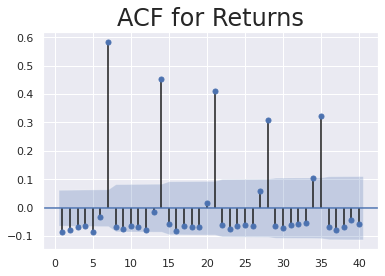

In [14]:
sgt.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title("ACF for Returns", size=24)
plt.show()

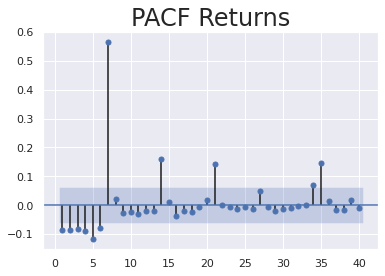

In [15]:
sgt.plot_pacf(df.returns[1:], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Returns", size=24)
plt.show()

## MA(1) sobre los retornos

In [16]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                  967
Model:                     ARMA(0, 1)   Log Likelihood               -7586.648
Method:                       css-mle   S.D. of innovations            618.073
Date:                Wed, 07 Oct 2020   AIC                          15179.295
Time:                        22:03:29   BIC                          15193.918
Sample:                    01-03-2018   HQIC                         15184.862
                         - 09-03-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           151.0592     17.804      8.485      0.000     116.164     185.954
ma.L1.returns    -0.1043      0.036     -2.904      0.004      -0.175      -0.034
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            9.5832           +0.0000j            9.5832            0.0000
-----------------------------------------------------------------------------
"""

## MA(n) sobre los retornos

In [17]:
model_ret_ma_2 = ARMA(df.returns[1:], order=(0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_1, results_ret_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                  967
Model:                     ARMA(0, 2)   Log Likelihood               -7581.446
Method:                       css-mle   S.D. of innovations            614.748
Date:                Wed, 07 Oct 2020   AIC                          15170.893
Time:                        22:05:41   BIC                          15190.389
Sample:                    01-03-2018   HQIC                         15178.315
                         - 09-03-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           151.1785     15.357      9.844      0.000     121.079     181.278
ma.L1.returns    -0.1137      0.032     -3.544      0.000      -0.177      -0.051
ma.L2.returns    -0.1098      0.033     

In [18]:
model_ret_ma_3 = ARMA(df.returns[1:], order=(0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_2, results_ret_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                  967
Model:                     ARMA(0, 3)   Log Likelihood               -7578.790
Method:                       css-mle   S.D. of innovations            613.059
Date:                Wed, 07 Oct 2020   AIC                          15167.580
Time:                        22:06:08   BIC                          15191.951
Sample:                    01-03-2018   HQIC                         15176.858
                         - 09-03-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           151.2497     14.504     10.428      0.000     122.823     179.676
ma.L1.returns    -0.1049      0.032     -3.251      0.001      -0.168      -0.042
ma.L2.returns    -0.0909      0.031     

In [19]:
model_ret_ma_4 = ARMA(df.returns[1:], order=[0,4])
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_3, results_ret_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                  967
Model:                     ARMA(0, 4)   Log Likelihood               -7573.962
Method:                       css-mle   S.D. of innovations            609.890
Date:                Wed, 07 Oct 2020   AIC                          15159.925
Time:                        22:06:32   BIC                          15189.170
Sample:                    01-03-2018   HQIC                         15171.058
                         - 09-03-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           151.1236     14.679     10.295      0.000     122.353     179.894
ma.L1.returns    -0.1145      0.034     -3.408      0.001      -0.180      -0.049
ma.L2.returns    -0.1113      0.029     

In [20]:
model_ret_ma_5 = ARMA(df.returns[1:], order=[0,5])
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_4, results_ret_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                  967
Model:                     ARMA(0, 5)   Log Likelihood               -7571.372
Method:                       css-mle   S.D. of innovations            608.199
Date:                Wed, 07 Oct 2020   AIC                          15156.745
Time:                        22:06:49   BIC                          15190.864
Sample:                    01-03-2018   HQIC                         15169.734
                         - 09-03-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           151.4596     14.607     10.369      0.000     122.830     180.090
ma.L1.returns    -0.0654      0.028     -2.337      0.020      -0.120      -0.011
ma.L2.returns     0.1956      0.038     

In [21]:
model_ret_ma_6 = ARMA(df.returns[1:], order=[0,6])
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_5, results_ret_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                  967
Model:                     ARMA(0, 6)   Log Likelihood               -7548.189
Method:                       css-mle   S.D. of innovations            593.607
Date:                Wed, 07 Oct 2020   AIC                          15112.378
Time:                        22:07:22   BIC                          15151.372
Sample:                    01-03-2018   HQIC                         15127.222
                         - 09-03-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           151.0593     16.510      9.150      0.000     118.700     183.418
ma.L1.returns    -0.3501      0.033    -10.642      0.000      -0.415      -0.286
ma.L2.returns     0.1840      0.034     

In [22]:
model_ret_ma_7 = ARMA(df.returns[1:], order=[0,7])
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_6, results_ret_ma_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                  967
Model:                     ARMA(0, 7)   Log Likelihood               -7448.677
Method:                       css-mle   S.D. of innovations            535.425
Date:                Wed, 07 Oct 2020   AIC                          14915.355
Time:                        22:07:58   BIC                          14959.222
Sample:                    01-03-2018   HQIC                         14932.055
                         - 09-03-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           150.8922     21.785      6.926      0.000     108.195     193.590
ma.L1.returns    -0.0630      0.028     -2.213      0.027      -0.119      -0.007
ma.L2.returns    -0.0346      0.029     

In [23]:
model_ret_ma_8 = ARMA(df.returns[1:], order=[0,8])
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_7, results_ret_ma_8)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                  967
Model:                     ARMA(0, 8)   Log Likelihood               -7446.606
Method:                       css-mle   S.D. of innovations            534.278
Date:                Wed, 07 Oct 2020   AIC                          14913.212
Time:                        22:08:23   BIC                          14961.954
Sample:                    01-03-2018   HQIC                         14931.768
                         - 09-03-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           150.9347     20.139      7.495      0.000     111.463     190.406
ma.L1.returns    -0.0972      0.033     -2.946      0.003      -0.162      -0.033
ma.L2.returns    -0.0391      0.029     

In [24]:
LLR_test(results_ret_ma_6, results_ret_ma_8, DF = 2)

0.0

## Residuos de los retornos

In [27]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]
print("La media de los residuos " + str(round(df.res_ret_ma_8.mean(),3)) + "\nLa varianza de los residuos es " + str(round(df.res_ret_ma_8.var(),3)))
print("La desviacion estandar de los residuos es " + str(round(sqrt(df.res_ret_ma_8.var()),3)))

La media de los residuos -0.043
La varianza de los residuos es 286166.251
La desviacion estandar de los residuos es 534.945


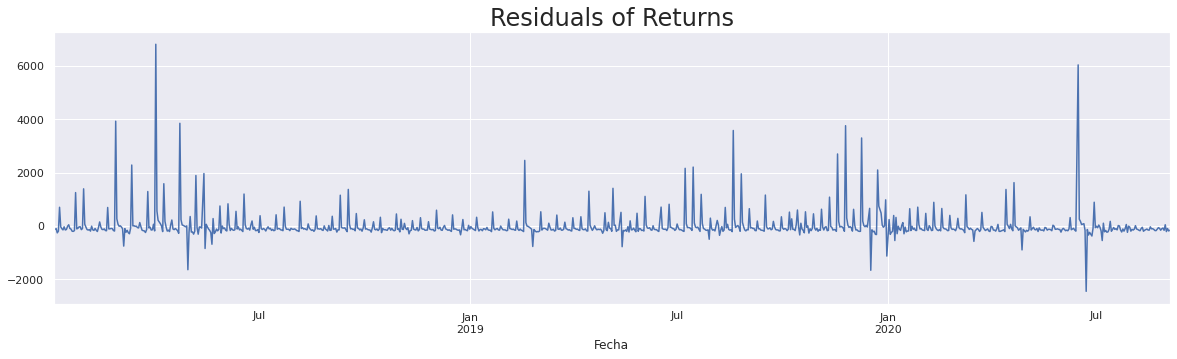

In [28]:
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [29]:
sts.adfuller(df.res_ret_ma_8[2:])

(-4.9414881723370785,
 2.893785867817837e-05,
 20,
 945,
 {'1%': -3.4372887850912175,
  '10%': -2.568401081996585,
  '5%': -2.8646033071530703},
 14404.207030913649)

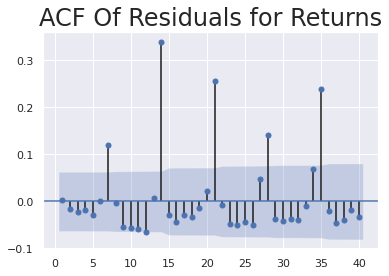

In [30]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()